In [2]:
DATA_HOME = "data"
!ls "$DATA_HOME"


fanfics.txt  train.txt	val.txt


In [12]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("sberbank-ai/rugpt3small_based_on_gpt2")

train_path = DATA_HOME + '/train.txt'
test_path = DATA_HOME + '/test.txt'

data_path = DATA_HOME + '/fanfics.txt'

Special tokens have been added in the vocabulary, make sure the associated word embedding are fine-tuned or trained.


In [4]:
from fastai.text import *

In [5]:
import torch
gpu = 1
torch.cuda.set_device(gpu)
print(f'cuda device: {torch.cuda.current_device()}')

cuda device: 1


In [6]:
from fastai.vision.all import *
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [7]:
from transformers import GPT2TokenizerFast, GPT2LMHeadModel
pretrained_weights = "sberbank-ai/rugpt3small_based_on_gpt2"
tokenizer = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)

Special tokens have been added in the vocabulary, make sure the associated word embedding are fine-tuned or trained.


In [8]:
tokenizer.pad_token = tokenizer.eos_token

In [9]:
model.config

GPT2Config {
  "_name_or_path": "sberbank-ai/rugpt3small_based_on_gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "gradient_checkpointing": false,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 2048,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 2048,
  "resid_pdrop": 0.1,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "use_cache": true,
  "vocab_size": 50264
}

In [10]:

# source: https://huggingface.co/transformers/_modules/transformers/tokenization_utils_fast.html
    
# print('short-cut-names:',tokenizer.short-cut-names) 
# print()  

print('max_model_input_sizes')
for k,v in tokenizer.max_model_input_sizes.items():
    print('- ',k,v)
print()
    
print('model_max_length:',tokenizer.model_max_length)
print()

for k,v in tokenizer.pretrained_init_configuration.items():
    print(k,v)
    
print('padding_side:',tokenizer.padding_side)
print()

print('model_input_names:',tokenizer.model_input_names)
print()

print('bos_token & bos_token_id:',tokenizer.bos_token,tokenizer.bos_token_id)
print()

print('eos_token & eos_token_id:',tokenizer.eos_token,tokenizer.eos_token_id)
print()

print('unk_token & unk_token_id:',tokenizer.unk_token,tokenizer.unk_token_id)
print()

print('sep_token:',tokenizer.sep_token)
print()

print('pad_token, pad_token_id & pad_token_type_id:',tokenizer.pad_token,tokenizer.pad_token_id,tokenizer.pad_token_type_id)
print()

print('cls_token:',tokenizer.cls_token)
print()

print('mask_token:',tokenizer.mask_token)
print()

print('additional_special_tokens:',tokenizer.additional_special_tokens)
print()

print('all_special_tokens & all_special_ids:',tokenizer.all_special_tokens,tokenizer.all_special_ids)
print()

print('---------- vocab ----------')
print()

print('vocab_files_names:',tokenizer.vocab_files_names)
print()

for k,v in tokenizer.pretrained_vocab_files_map.items():
    print(k)
    for kk,vv in v.items():
        print('- ',kk,':',vv)
    print()
    
print('vocab_size:',tokenizer.vocab_size)
print()
#print(tokenizer.get_vocab())


Using sep_token, but it is not set yet.
Using cls_token, but it is not set yet.
Using mask_token, but it is not set yet.


max_model_input_sizes
-  gpt2 1024
-  gpt2-medium 1024
-  gpt2-large 1024
-  gpt2-xl 1024
-  distilgpt2 1024

model_max_length: 1000000000000000019884624838656

padding_side: right

model_input_names: ['attention_mask']

bos_token & bos_token_id: <|endoftext|> 50257

eos_token & eos_token_id: <|endoftext|> 50257

unk_token & unk_token_id: <|endoftext|> 50257

sep_token: None

pad_token, pad_token_id & pad_token_type_id: <|endoftext|> 50257 0

cls_token: None

mask_token: None

additional_special_tokens: []

all_special_tokens & all_special_ids: ['<|endoftext|>', '<|endoftext|>', '<|endoftext|>', '<|endoftext|>'] [50257, 50257, 50257, 50257]

---------- vocab ----------

vocab_files_names: {'vocab_file': 'vocab.json', 'merges_file': 'merges.txt', 'tokenizer_file': 'tokenizer.json'}

vocab_file
-  gpt2 : https://huggingface.co/gpt2/resolve/main/vocab.json
-  gpt2-medium : https://huggingface.co/gpt2-medium/resolve/main/vocab.json
-  gpt2-large : https://huggingface.co/gpt2-large/resolve/

In [13]:
import pandas as pd
import numpy as np
with open(data_path, "r") as file:
    text = file.readlines()
texts_df = pd.DataFrame(text, columns=['text'])
texts_df.head()

,text
0,"— Я обещаю тебе, что совершу чудо. Ты веришь мне? Холодный майский ветер унес эти слова, оставляя их лишь тому, кому они изначально адресованы. Девушка улыбнулась, нотка счастья показалась на ее лице, однако ничего не могло утешить ее, успокоить ту тревогу, которая еще давно легла на сердце. Вновь вернулся грустный, почти убитый взгляд. А мужчина все крепче прижимал её маленькое, слабое тело к себе. Он хотел защитить ее, но совсем скоро ему предстоит уйти. Может быть, навсегда. — Вернись, пожалуйста, — сквозь слезы прошептала она, — ты ведь нужен не только мне, но и всей своей семье, солнц..."
1,"Осень такая пора, Тебя никто не поймет не когда. И сколько не делай для этих людей, Они по другому к тебе отнесутся, Ведь им плевать на ваши чувства. Они не чувствуют,не дышат, Они не знают что такое боль. Но иногда от них хочется услышать, Что наконец,все будет хорошо.\n"
2,"Это ты, И я играю с тобой, Это ты, И мне не кто не нужен другой, Это ты, Я играю с тобой, Это ты, Я люблю тебя, Это ты,И не кому не отдам, Это ты... Я играю с тобой словами любви, И это снова ты, Проклинаю тебя, За твои грехи, Это снова ты.\n"
3,"На кладбище было тихо. Вопреки настроению, солнце безжалостно светило, не думая о людях. Два мага стояли возле свежей могилы. Ученик и учитель, молодой парень и седой старик. По щекам юнца текли слезы, но взгляд его был тверд. - Учитель, но я ведь все равно смогу увидеть их. Печально посмотрел на него старик: - Нет, дорогой, твоих родителей не вернуть. - Но почему?! Я теперь могу это! Я некромант! Отчаянный крик парня разорвал тишину. - Послушай, мой ученик. Есть одно правило, самое главное для некроманта. Никогда, ни за что не воскрешай своих любимых. - Как же?... - ученик перестал плакат..."
4,"Нирн - мир где много красивых мест, шумных городов, мелких деревушек, девственных лесов, а так же кровопролитных войн где люди и нелюди, жаждут власти и повиновения, где костром сжигают деревни, осаждают города, уничтожают леса, мир находится на грани уничтожения, но в пророчестве гласит «Время и место каждого Подвига определяется Судьбой. Но если не придёт Герой — не будет и Подвига.» Неизвестный автор, это пророчество было указано еще на древних свитках найденых под красной горой. Этот свиток лежал в руках богини Азуры. Расы населяющие Нирн Флориан - человек-растение. С виду Флориане без..."


In [14]:
num = int(0.8*len(texts_df))

idxs = np.random.randint(0, len(texts_df), len(texts_df))
idxs_train = idxs[:num]
idxs_val = idxs[num:]

In [15]:
%%time
all_texts = np.concatenate([texts_df.iloc[idxs_train].text.values, texts_df.iloc[idxs_val].text.values])

CPU times: user 2.03 ms, sys: 243 µs, total: 2.28 ms
Wall time: 1.65 ms


In [16]:

from fastai.data.core import TfmdLists
from fastai.text.data import LMDataLoader
splits = [list(idxs_train), list(idxs_val)]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

In [17]:
tls.train[0],tls.valid[0]

(tensor([40149,   723,   618,  ...,   265,   723,   203]),
 tensor([1295, 8398,   16,  ..., 2083,   35,  203]))

In [19]:
tls.tfms(tls.train.items[0]).shape, tls.tfms(tls.valid.items[0]).shape

(torch.Size([4017]), torch.Size([1046]))

In [20]:
show_at(tls.train, 0)

 Вечер...Арису ушла,унеся с собой часть моей измученной души... Я лежу в ванне наполненной водой,руки свисают с ее краев и капли алой,теплой крови капают на белый кафель...Мама так тщательно выбирала его,а я все испорчу... Ах,Арису,находясь рядом с тобой,я перенесла много счастливых моментов,ты избавила меня от одиночества,дала мне шанс на теплую любовь,в этом сером и холодном мире... Сейчас,когда я бледная лежу в кровавой воде,я не боюсь встретиться со смертью,на моем лице улыбка и мои мысли улетают далеко далеко...и я думаю о тебе,Арису... Эта короткая история наполнена моими собственными переживаниями,чувствами и эмоциями,моя философия возможна не будет принята вами,но для меня...все было очень по настоящему... <i></i> Я всегда была жизнерадостным ребенком,наслаждающемся жизнью,но потом произошел переломный момент,меня привлекало общение со сверстниками,все начали сторонились меня,считая странной;даже когда я пыталась завести новое знакомство одноклассники,бросая на меня недоуменные

In [21]:
%%time
bs,sl = 8,1024
dls = tls.dataloaders(bs=bs, seq_len=sl)

CPU times: user 3min 17s, sys: 2.25 s, total: 3min 19s
Wall time: 3min 19s


In [22]:
%%time
def tokenize(text):
    toks = tokenizer.tokenize(text)
    return tensor(tokenizer.convert_tokens_to_ids(toks))

tokenized = [tokenize(t) for t in progress_bar(all_texts)]

CPU times: user 3min 8s, sys: 769 ms, total: 3min 8s
Wall time: 3min 8s


In [23]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        return x if isinstance(x, Tensor) else tokenize(x)
        
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [24]:
%%time
tls2 = TfmdLists(tokenized, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
dls2 = tls.dataloaders(bs=8, seq_len=1024)

CPU times: user 3min 16s, sys: 373 ms, total: 3min 16s
Wall time: 3min 16s


In [25]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [26]:
def splitter(model):
    "Split a GPT2 `model` in 3 groups for differential learning rates."
    
    # First layers group : decoder blocks from 0 to 3
    modules = []
    for i in range(4): modules.append(model.transformer.h[i])
    groups = [nn.Sequential(*modules)]

    # Second layers group : decoder blocks from 4 to 7
    modules = []
    for i in range(4,8,1): modules.append(model.transformer.h[i])
    groups = L(groups + [nn.Sequential(*modules)])

    # Third layers group : decoder blocks from 8 to 11
    modules = []
    for i in range(8,12,1): modules.append(model.transformer.h[i])
    groups = L(groups + [nn.Sequential(*modules)])
    
    # Fourth layers group : embeddings matrices wte and wpe + LayerNorm at the model output
    groups = L(groups + [nn.Sequential(model.transformer.wte,model.transformer.wpe,model.transformer.ln_f)])
    
    return groups.map(params)

In [27]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(),
                splitter = splitter,
                cbs=[DropOutput], 
                metrics=[accuracy, Perplexity()]).to_fp16()

In [28]:
# Check the number of parameters groups and the hyperparameters values
learn.create_opt()
print(f'number of parameters groups: {len(learn.opt.param_groups)}')

# ... and the list of Learning Rates (before its atualization by the Optimizer of the function fit_one_cycle())
for i,h in enumerate(learn.opt.hypers):
    print(i,h)

number of parameters groups: 4
0 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}
1 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}
2 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}
3 {'wd': 0.01, 'sqr_mom': 0.99, 'lr': 0.001, 'mom': 0.9, 'eps': 1e-05}


In [29]:
learn.model = model.cuda()


In [37]:
learn.freeze()
learn.summary()

GPT2LMHeadModel (Input shape: 8)
Layer (type)         Output Shape         Param #    Trainable 
                     8 x 1024 x 768      
Embedding                                 38602752   True      
Embedding                                 1572864    True      
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     8 x 1024 x 2304     
Conv1D                                    1771776    False     
Conv1D                                    590592     False     
Dropout                                                        
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     8 x 1024 x 3072     
Conv1D                                    23623

### Generating (Top-p nucleus sampling)

In [ ]:
%%time
sample_outputs = model_last2.generate(input_ids, pad_token_id=50256,
                                   do_sample=True,
                                   max_length=250, 
                                   min_length=10,
                                   repetition_penalty=1.2,
                                   temperature=0.7,
                                   top_k=50, 
                                   top_p=0.95, 
                                   num_return_sequences=3)

for i, sample_output in enumerate(sample_outputs):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizer.decode(sample_output.tolist())))
    print('\n---')

### Freeze all layers but the last 3 layers groups

In [31]:
learn.freeze_to(-3)
learn.summary()

GPT2LMHeadModel (Input shape: 8)
Layer (type)         Output Shape         Param #    Trainable 
                     8 x 1024 x 768      
Embedding                                 38602752   True      
Embedding                                 1572864    True      
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     8 x 1024 x 2304     
Conv1D                                    1771776    False     
Conv1D                                    590592     False     
Dropout                                                        
Dropout                                                        
LayerNorm                                 1536       True      
____________________________________________________________________________
                     8 x 1024 x 3072     
Conv1D                                    23623

In [32]:
learn.fit_one_cycle(1, slice(3e-7/(2.6**4),3e-7))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.438645,3.376594,0.380439,29.270899,1:24:11


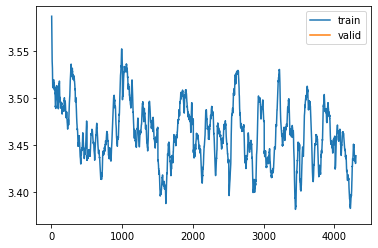

In [33]:
learn.recorder.plot_loss()

In [34]:
model_last3 = learn.model
# encode
prompt = "он посмотрел на меня"
input_ids = tokenizer.encode(prompt, return_tensors='pt').to('cuda')

### Generating (Top-k sampling)

In [35]:
%%time
#set top_k = 40 and num_return_sequences = 3
sample_outputs = model_last3.generate(input_ids, pad_token_id=50264,
                                   do_sample=True, 
                                   max_length=500, 
                                   min_length=10,
                                   top_k=40,
                                   num_return_sequences=3)

for i, sample_output in enumerate(sample_outputs):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizer.decode(sample_output.tolist())))
    print('\n---')

>> Generated text 1

он посмотрел на меня, но ничего не сказал. – Ну, ладно, – бросил тот. – А куда еще? Вы ведь на своем месте? - Конечно. Я ведь еще и с тобой разговариваю!

Кое от чего я не согласился, но сейчас не мог не заметить, как все это стало каким-то не таким. Я повернулся на каблуки и почти бегом помчался к зданию, где ждал меня парень с двумя маленькими детьми, с которыми я говорил о моем приезде. Мне стало ясно, что я действительно приехал сюда на встречу с Крэйвеном. Я хотел поговорить с ним о Крэйвенове, но не смог заставить себя зайти. Крэйвен снова показался мне человеком. Возможно, это просто он такой. По крайней мере, я не хотел ничего думать об этом. Но он явно был с кем-то другим. С кем же, из-за чего он так странно себя ведет, да не с самим этим? - Привет! – Я даже удивился тому, с чего Крэйвен начал разговор. Он вообще ничего не говорил или, по крайней мере, говорил не очень уверенно. Я хотел еще что-то спросить, но Крэйвен перебил меня. – Ты не был у него? – ре

### Generating (Top-p nucleus sampling)

In [36]:
%%time
sample_outputs = model_last3.generate(input_ids, pad_token_id=50256,
                                   do_sample=True,
                                   max_length=250, 
                                   min_length=10,
                                   repetition_penalty=1.2,
                                   temperature=0.7,
                                   top_k=50, 
                                   top_p=0.95, 
                                   num_return_sequences=3)

for i, sample_output in enumerate(sample_outputs):
    print(">> Generated text {}\n\n{}".format(i+1, tokenizer.decode(sample_output.tolist())))
    print('\n---')

>> Generated text 1

он посмотрел на меня, как бы пытаясь понять: что я делаю не так?  Нет.  Я стою у него за спиной и смотрю прямо в глаза - нет... 
 И тогда он вдруг резко поворачивается ко мне лицом и кричит так громко, будто плачет от боли.  Он смеется, а потом неожиданно падает со стула, крепко прижимая к себе мою руку и глядя на нее своими карими глазами. 
 Я знаю это выражение лица и всегда его знала.  На мгновение стало легче дышать, но тут же все вернулось назад — и эта боль, и тот страх, который она чувствовала. 
 Это было невыносимо больно!  Боль была настолько сильной, что казалось сейчас умру сама, лишь бы избавиться от этого чувства.  Я не могла даже думать о том, чтобы снова стать маленькой девочкой.  Но когда мои руки уже перестали держать его ладонь, я вновь услышала этот крик.  А может быть это была просто сон наяву?  Возможно ли такое вообще?!.." 
 Этот момент я помню с самого начала своей жизни.  Мне постоянно снились кошмары.  Помню каждую секунду сна.  Сон был так